In [1]:
import pandas as pd

In [2]:
# Datasets (in general)
# 1. How comprehensive are these datasets?
# 2. How recent are they? 
# 3. Can any aspects be independently validated/verified?
# 4. What makes these datasets authoritative?

# LBSM
# How accurate is the London Building Stock Model?
# What social indicators to use?

# EPC 
# How reliable/variable is the EPC data? 

# Methodology
# Any critical consideration?

In [3]:
df = pd.read_csv('../data/row/LBSMv2_Camden.csv')
df.head()

,uprn,os_topo_toid,easting,northing,postcode_locator,administrative_area,oa21cd,lsoa21cd,lsoa21nm,lsoa11cd,...,avg_tilt,imd19_national_decile,imd19_income_decile,loac_supergroup,loac_group,fuel_poverty,heat_risk_quintile,listed_building_grade,conservation_area_flag,conservation_area_site_id
0,200125425,1000004055135,524239.02,185679.53,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
1,200125422,1000004055130,524218.90,185697.60,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
2,200125427,1000004055137,524243.74,185671.32,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
3,200125419,1000004055133,524227.60,185705.80,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
4,200125431,1000004055141,524253.16,185655.24,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area


In [4]:
df['loac_group'].value_counts()

loac_group
E1 - Challenged Inner London Communities                  28573
D3 - Senior Professionals                                 17437
D1 - City Support Workers                                 15913
B1 - Social Rented Sector Professional Support Workers    15117
A3 - European Enclaves                                    12967
E2 - Social Rented Sector Pockets                         11437
A2 - Inner London Working Professionals                    8211
D2 - Central and City                                      6114
A1 - Established Homeowners with Children                  3315
B2 - Skilled Trades and Construction Workers               1595
F2 - Social Rented Sector and Diverse Origins               951
G1 - Professional Periphery                                  10
Name: count, dtype: int64

<Axes: >

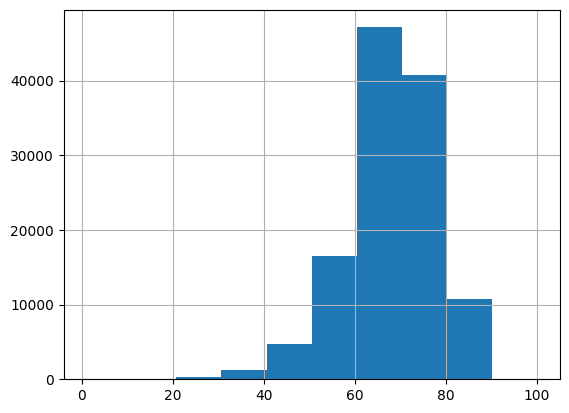

In [5]:
df['epc_score'].hist()

In [6]:
df.shape

(121640, 63)

In [7]:
cols = df.columns
epc_cols = [col for col in cols if 'epc' in col]

In [8]:
cols

Index(['uprn', 'os_topo_toid', 'easting', 'northing', 'postcode_locator',
       'administrative_area', 'oa21cd', 'lsoa21cd', 'lsoa21nm', 'lsoa11cd',
       'lsoa11nm', 'ward22cd', 'ward22nm', 'property_type', 'built_form',
       'property_type_built_form', 'tenure', 'tenure_known', 'building_use',
       'construction_age_band', 'construction_age_band_known', 'epc_score',
       'epc_score_known', 'epc_rating', 'epc_rating_known',
       'potential_epc_score', 'potential_epc_score_known',
       'potential_epc_rating', 'potential_epc_rating_known',
       'number_habitable_rooms', 'number_habitable_rooms_known',
       'total_floor_area', 'total_floor_area_known', 'estimated_floor_count',
       'basement_floor', 'wall_type', 'wall_type_known', 'wall_insulation',
       'wall_insulation_known', 'roof_type', 'roof_type_known',
       'roof_insulation', 'roof_insulation_known', 'glazing_type',
       'glazing_type_known', 'main_heat_type', 'main_heat_type_known',
       'main_fuel_type

In [9]:
# LBSMv2 как источник, в котором данных больше всего. EPC как источник, на который можно опереться в плане качества данных (проверка по пересечению с LBSMv2) + 
# обновление данных на основе EPC (потому что там данные свежее)
# LBSMv2 - продукт Greater London Authority в партнёрстве (в описаниях фигурирует UCL Energy Institute), используемый для городских программ энергоэффективности
# (https://data.london.gov.uk/dataset/london-building-stock-model-lbsm-296oy/) - каких?
# Ограничения:
#   (1) Данные - снэпшот на определенную дату (какую?)

# EPC - государственный реестр энерго-сертификатов с публичным доступом и документацией - кто его делает?. Государственные источники авторитетные. 
# (https://epc.opendatacommunities.org/?utm_source=chatgpt.com)
# Ограничения:
#   (1) Данные - только для части домов (каких?)

# Camden Open Data - государственный источник с открытыми данными по району - а его кто делает?
# (https://opendata.camden.gov.uk/?)

# Верификационные стратегии:
# 1) сравнение данных LBSMv2 и EPC по пересекающимся домам и выяснить:
#   (1) сколько процентов - исходные данные и сколько - смоделированные
#   (2) в каких домах выводы на основе моделирования
# 2) сравнение зон охраны с зонами, указанными в LBSMv2:
#   (1) сколько домов в зонах охраны
#   (2) насколько данные правильные в LBSMv2

# какие именно дома мы не трогаем в conservation area?
# Camden Retrofit at Scale - почитать (https://camden.moderngov.co.uk/mgConvert2PDF.aspx?ID=122232&utm_source=chatgpt.com)

In [ ]:
# Тема? Почему именно такая тема?

# Почему именно такие признаки? - мы здесь

# Почему именно такая методология?
# Почему именно такие данные?

# Действительно ли сложно проводить ретрофитинг в зонах охраны? 

In [ ]:
# A) “Кластеры для доставки” (delivery clusters)

# Критерий: дома физически рядом → удобно одной бригаде/логистике/подрядчику.
# Тогда кластеризация по координатам (DBSCAN/HDBSCAN), а “похожесть по зданию” ты показываешь как профиль внутри кластера
# (медианный EPC, доля wall_type и т.п.).

In [25]:
df

,uprn,os_topo_toid,easting,northing,postcode_locator,administrative_area,oa21cd,lsoa21cd,lsoa21nm,lsoa11cd,...,avg_tilt,imd19_national_decile,imd19_income_decile,loac_supergroup,loac_group,fuel_poverty,heat_risk_quintile,listed_building_grade,conservation_area_flag,conservation_area_site_id
0,200125425,1000004055135,524239.02,185679.53,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
1,200125422,1000004055130,524218.90,185697.60,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
2,200125427,1000004055137,524243.74,185671.32,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
3,200125419,1000004055133,524227.60,185705.80,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
4,200125431,1000004055141,524253.16,185655.24,NW2 2RT,Camden,E00000684,E01000143,Barnet 041D,E01000143,...,35.0,3,2,F - Young Families and Mainstream Employment,F2 - Social Rented Sector and Diverse Origins,11.4,2,Unknown,not in conservation area,not in conservation area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121635,5045899,1000005433073,529706.00,183397.00,NW1 1UG,Camden,E00190469,E01035709,Camden 022G,E01000953,...,19.0,2,2,E - Social Rented Sector Families with Children,E1 - Challenged Inner London Communities,11.8,5,Unknown,in conservation area,SCM00000149
121636,5035451,1000005433071,529719.00,183377.00,NW1 1UG,Camden,E00190469,E01035709,Camden 022G,E01000953,...,20.0,2,2,E - Social Rented Sector Families with Children,E1 - Challenged Inner London Communities,11.8,5,Unknown,in conservation area,SCM00000149
121637,5024248,1000005433074,529781.00,183353.00,NW1 1UH,Camden,E00190469,E01035709,Camden 022G,E01000953,...,16.0,2,2,E - Social Rented Sector Families with Children,E1 - Challenged Inner London Communities,11.8,5,Unknown,in conservation area,SCM00000149
121638,5045886,1000005433073,529706.00,183397.00,NW1 1UG,Camden,E00190469,E01035709,Camden 022G,E01000953,...,19.0,2,2,E - Social Rented Sector Families with Children,E1 - Challenged Inner London Communities,11.8,5,Unknown,in conservation area,SCM00000149
